# Install packages

In [21]:
! pip3 install sympy matplotlib

     |████████████████████████████████| 9.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 563 kB/s eta 0:00:01
     |████████████████████████████████| 295 kB 6.0 MB/s eta 0:00:01
  Using cached Pillow-9.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 959 kB 5.9 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)


In [1]:
import sympy as sym
from sympy.abc import s, t, y, x, y, z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

In [2]:
U = laplace_transform(5*t, t, s)
U[0]

5/s**2

In [3]:
inverse_laplace_transform(U[0], s, t)

5*t*Heaviside(t)

In [4]:
F = 5*(s+1)/(s+3)**2
F

(5*s + 5)/(s + 3)**2

In [5]:
sym.apart(F)

5/(s + 3) - 10/(s + 3)**2

In [6]:
d1 = (s+1)*(s+3)*(s**2+3*s+1)
d1

(s + 1)*(s + 3)*(s**2 + 3*s + 1)

In [7]:
d2=sym.expand(d1)
d2

s**4 + 7*s**3 + 16*s**2 + 13*s + 3

In [8]:
sym.roots(d2)

{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

Time:  0.8442832870005077


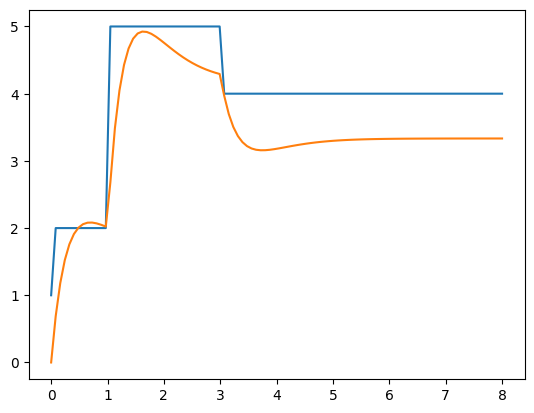

In [14]:
# Individual inputs
# U1 = 2/s*sym.exp(-s)
# U2 = -1/s**2*sym.exp(-3*s)
# U3 = 1/s**2*sym.exp(-5*s)

U1 = -1/s*sym.exp(-3*s)
U2 = 2/s
U3 = 3/s*sym.exp(-1*s)

# U = U1 * U2 * U3

# Transfer function
G = 5*(s+1)/((s+3)*(s+2))

# Response
# Y = G * U
Y1 = G * U1
Y2 = G * U2
Y3 = G * U3

#Inverse Laplace Transform
start = timeit.default_timer()
u1 = inverse_laplace_transform(U1, s, t)
u2 = inverse_laplace_transform(U2, s, t)
u3 = inverse_laplace_transform(U3, s, t)

y1 = inverse_laplace_transform(Y1, s, t)
y2 = inverse_laplace_transform(Y2, s, t)
y3 = inverse_laplace_transform(Y3, s, t)
stop = timeit.default_timer()
print('Time: ', stop - start)  
# y1

# Generate data for plot
tm = np.linspace(0,8,100)
us = np.zeros(len(tm))
ys = np.zeros(len(tm))

for u in [u1, u2, u3]:
    for i in range(len(tm)):
        us[i] += u.subs(t, tm[i])

for y in [y1, y2, y3]:
    for i in range(len(tm)):
        ys[i] += y.subs(t, tm[i])

plt.figure()
plt.plot(tm, us)
plt.plot(tm, ys)
plt.show()

In [185]:
inverse_laplace_transform(G, s, t)

5*DiracDelta(t) - 10*exp(-3*t)*Heaviside(t)

In [103]:
y1

5*(exp(3*t) + 2)*exp(-3*t)*Heaviside(t)/3

In [105]:
y1

5*(-exp(3*t) - 2)*exp(-3*t)*Heaviside(t)/3

In [93]:
12 * y1.subs(t, 100)

20*(1196 + exp(300))*exp(-300)

In [78]:
type(y2)

sympy.core.mul.Mul

In [79]:
type(G)

sympy.core.mul.Mul

In [61]:
y3

5*(6*t + exp(3*t) - 1)*exp(-3*t)*Heaviside(t)/3

In [8]:
!jupyter labextension list

JupyterLab v3.4.2
/home/szymciem/.local/share/jupyter/labextensions
        @jupyter-widgets/jupyterlab-manager v3.1.1 enabled OK (python, jupyterlab_widgets)

/usr/local/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled OK (python, jupyterlab_pygments)



In [10]:
!jupyter labextension install jupyter-matplotlib

An error occurred.
PermissionError: [Errno 13] Permission denied: '/usr/local/share/jupyter/lab/extensions'
See the log file for details:  /tmp/jupyterlab-debug-6w55uwlp.log


In [11]:
!jupyterlab && jupyter labextension update --all

/bin/bash: jupyterlab: command not found


In [1]:
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [2]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

In [7]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [3]:
widgets.IntSlider()

IntSlider(value=0)

In [4]:
widgets.IntSlider().keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [5]:
widgets.IntSlider(stea=2)

IntSlider(value=0)

In [28]:
@widgets.interact(a=(-5, 5, 0.01), b=(-5, 5, 0.01))
def sine_wave(a=1, b=1):
    x = np.linspace(-10,10,1000)
    y = b*np.sin(a*x)
    
    plt.figure()
    
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    plt.plot(x, y)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

In [46]:
x = np.linspace(-10,10,1000)
def sine_wave(t=0, freq=1):
    y = np.sin(freq*x+0.1*t)
    plt.xlim(-10, 10)
    plt.plot(x,y)

In [48]:
widgets.interact(sine_wave, t=widgets.Play(min=0, max=200, step=0.001), freq=(1, 5, 0.01))

interactive(children=(Play(value=0, description='t', max=200), FloatSlider(value=1.0, description='freq', max=…

<function __main__.sine_wave(t=0, freq=1)>

In [53]:
inverse_laplace_transform(3/s, s, t)

3*Heaviside(t)

In [153]:
from sympy.abc import s, t, y, x, y, z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

In [154]:
class DynamicModel:
    
    def __init__(self, definition, initial_values=None):
        self.symbolic_definition = definition
        self.initial_values = initial_values
        
    @property
    def differential(self):
        return inverse_laplace_transform(self.symbolic_definition, s, t)


In [155]:
G = 5*(s+1)/((s+3)*(s+2))
dynamic_model = DynamicModel(G)

In [176]:
import random
from sympy.abc import s, t, y, x, y, z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

class DynamicProcess():
    
    def __init__(self, model, step_value, sim_step = 0.1):
        self.step_value = step_value
        self.model = model.symbolic_definition
        self.sim_time = 0
        self.step = sim_step
        self.output = 0
        self.U, self.u = self.create_input_process()
        self.y = self.create_output_process()
        
    def change_input(self, step_value):
        self.step_value = step_value
        
    def generate_inverse_laplace_inputs(self):
        for U in self.U:
            u1 = inverse_laplace_transform(U1, s, t)
            
    def generate_time_series(self, duration, n_steps, new_inputs=False):
        ts = np.linspace(0,duration,n_steps)
        us = np.zeros(len(ts))
        ys = np.zeros(len(ts))
        
        if new_inputs:
            self.U, self.u = self.create_input_process()
            self.y = self.create_output_process()
        
        for u in self.u:
            for i in range(len(ts)):
                us[i] += u.subs(t, ts[i])

        for y in self.y:
            for i in range(len(ts)):
                ys[i] += y.subs(t, ts[i])

        return ts, us, ys
        
    def create_output_process(self):
        y = []
        for U in self.U:
            print(U, self.model)
            sub = self.model * U
            y.append(inverse_laplace_transform(sub, s, t))
        return y
        
    def create_input_process(self, segments=5):
        from sympy.abc import s, t, y, x, y, z
        U, u = [], []
        
        for i in range(segments):
            k = random.randint(-10, 10)
            delay = round(random.uniform(-10, 0), 2)
            U_symbolic = k/s*sym.exp(delay*s)
            U.append(U_symbolic)
            u.append(inverse_laplace_transform(U_symbolic, s, t))
            
        return U, u
        
    def output_value(self):
        self.output = self.step_value * self.model.subs(t, self.sim_time)
        # self.output += self.model.subs(t, self.sim_time)
        self.sim_time += self.step
        return self.output

In [177]:
dynamic_process = DynamicProcess(dynamic_model, 100)
dynamic_process.model

-5*exp(-3.0*s)/s (5*s + 5)/((s + 2)*(s + 3))
-exp(-5.04*s)/s (5*s + 5)/((s + 2)*(s + 3))
-8*exp(-6.37*s)/s (5*s + 5)/((s + 2)*(s + 3))
8*exp(-0.85*s)/s (5*s + 5)/((s + 2)*(s + 3))
-3*exp(-2.69*s)/s (5*s + 5)/((s + 2)*(s + 3))


(5*s + 5)/((s + 2)*(s + 3))

-4*exp(-2.85*s)/s (5*s + 5)/((s + 2)*(s + 3))
-5*exp(-6.98*s)/s (5*s + 5)/((s + 2)*(s + 3))
4*exp(-8.79*s)/s (5*s + 5)/((s + 2)*(s + 3))
2*exp(-9.42*s)/s (5*s + 5)/((s + 2)*(s + 3))
3*exp(-0.45*s)/s (5*s + 5)/((s + 2)*(s + 3))


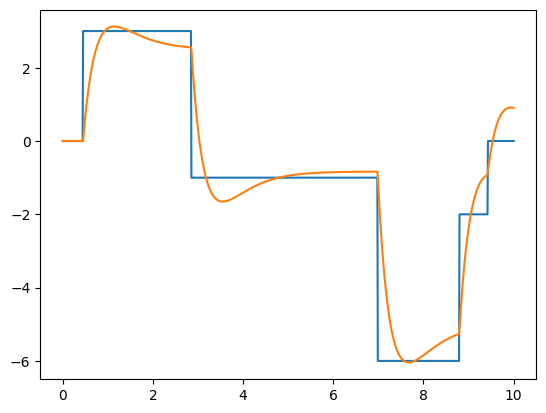

In [178]:
t, u, y = dynamic_process.generate_time_series(10, 1000, new_inputs=True)
plt.figure()
plt.plot(t, u)
plt.plot(t, y)
plt.show()